# 桑基图

桑基图（Sankey diagram），即桑基能量分流图，也叫桑基能量平衡图。一种特定类型的流程图，图中延伸的分支的宽度对应数据流量的大小,
通常应用于能源、材料成分、金融等数据的可视化分析。
因1898年Matthew Henry Phineas Riall Sankey绘制的"蒸汽机的能源效率图"而闻名，此后便以其名字命名为“桑基图”。
桑基图最明显的特征就是，始末端的分支宽度总和相等，即所有主支宽度的总和应与所有分出去的分支宽度的总和相等，保持能量的平衡。

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey

In [3]:
%matplotlib inline

`matplotlib.sankey.Sankey(ax=None, scale=1.0, unit='', format='%G', gap=0.25, radius=0.1, shoulder=0.03, offset=0.15, head_angle=100, margin=0.4, tolerance=1e-06, **kwargs)`是matplotlib构建桑基图的工具

他有两个方法来构造图形

+ `.add(patchlabel='', flows=None, orientations=None, labels='', trunklength=1.0, pathlengths=0.25, prior=None, connect=(0, 0), rotation=0, **kwargs)`
    
    + flows就是流入的百分比了负数表示为流出
    + labels是每个流的标签
    + orientations 的取值范围为[-1,0,1]有效值为1（从顶部到顶部），0（从左到右）或-1（从底部到底部）.如果orientation = 0，输入将从左边突入，输出将向右边突破。
    
    
    add()返回的还是一个Sankey对象,因此链式操作一直add()
    
+ `.finish()`构造结束

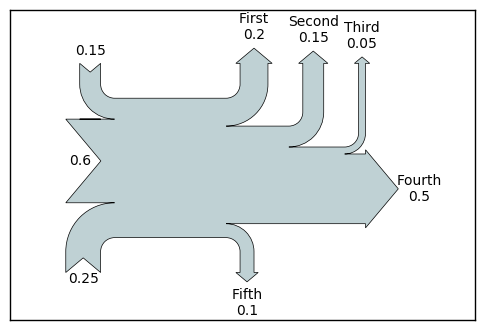

In [10]:
S=Sankey()
S.add(flows=[0.25, 0.15, 0.60, -0.20, -0.15, -0.05, -0.50, -0.10],
    labels=['', '', '', 'First', 'Second', 'Third', 'Fourth', 'Fifth'],
    orientations=[-1, 1, 0, 1, 1, 1, 0, -1]).finish()
S

我们也可以直接在构造函数里定义流

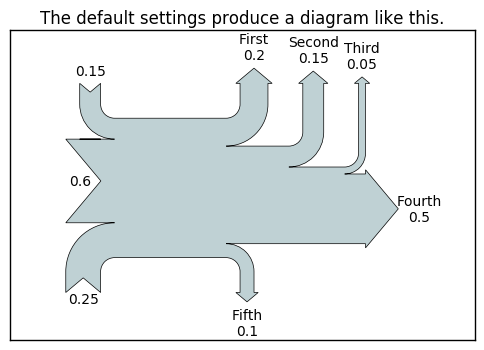

In [4]:
Sankey(flows=[0.25, 0.15, 0.60, -0.20, -0.15, -0.05, -0.50, -0.10],
       labels=['', '', '', 'First', 'Second', 'Third', 'Fourth', 'Fifth'],
       orientations=[-1, 1, 0, 1, 1, 1, 0, -1]).finish()
plt.title("The default settings produce a diagram like this.")

我们可以在finish()之后通过一些针对其中元素的操作做特殊化处理

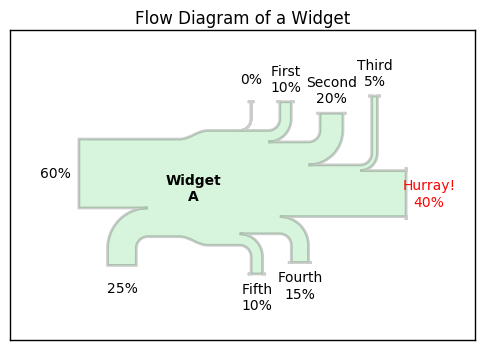

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[],
                     title="Flow Diagram of a Widget")
sankey = Sankey(ax=ax, scale=0.01, offset=0.2, head_angle=180,
                format='%.0f', unit='%')# 单位unit定义
sankey.add(flows=[25, 0, 60, -10, -20, -5, -15, -10, -40],
           labels=['', '', '', 'First', 'Second', 'Third', 'Fourth',
                   'Fifth', 'Hurray!'],
           orientations=[-1, 1, 0, 1, 1, 1, -1, -1, 0],
           pathlengths=[0.25, 0.25, 0.25, 0.25, 0.25, 0.6, 0.25, 0.25,
                        0.25],
           patchlabel="Widget\nA",
           alpha=0.2, lw=2.0)  # Arguments to matplotlib.patches.PathPatch()
diagrams = sankey.finish()
diagrams[0].patch.set_facecolor('#37c959')
diagrams[0].texts[-1].set_color('r')
diagrams[0].text.set_fontweight('bold')

如果有两张图用来表现两个系统的关系,可以像下面这么做

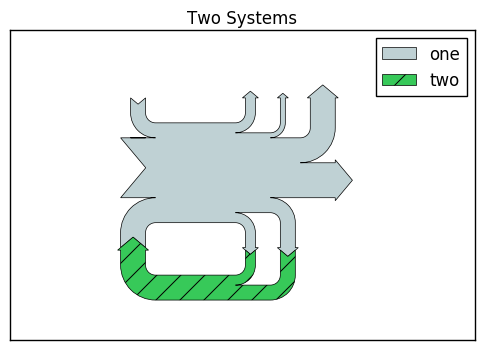

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[], title="Two Systems")
flows = [0.25, 0.15, 0.60, -0.10, -0.05, -0.25, -0.15, -0.10, -0.35]
sankey = Sankey(ax=ax, unit=None)
sankey.add(flows=flows, label='one',
           orientations=[-1, 1, 0, 1, 1, 1, -1, -1, 0])
sankey.add(flows=[-0.25, 0.15, 0.1], fc='#37c959', label='two',
           orientations=[-1, -1, -1], prior=0, connect=(0, 0))
diagrams = sankey.finish()
diagrams[-1].patch.set_hatch('/')
plt.legend(loc='best')